In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from wordcloud import WordCloud

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



def MissingDataPlot(df):
    '''
    plot missing data.
        1. bar
        2. matrix
    '''
    fig = plt.figure(figsize=((25, 10)))
    font = 12
    for i in range(1,3):
        ax1 = fig.add_subplot(1,2,1)
        missingno.bar(df,color=(0.0, 0.70, 1.00),fontsize=font,ax=ax1)
        ax2 = fig.add_subplot(1,2,2)
        missingno.matrix(df,color=(0.0, 0.70, 1.00),fontsize=font,ax=ax2)
    return plt.tight_layout()

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
for i in [train, test]:
    display(i.info())
    print('\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


None




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


None

C:\Users\ASUS\OneDrive\Desktop\Barmj project\Diamond-SHAI_For_AI-project\venv\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


None

None

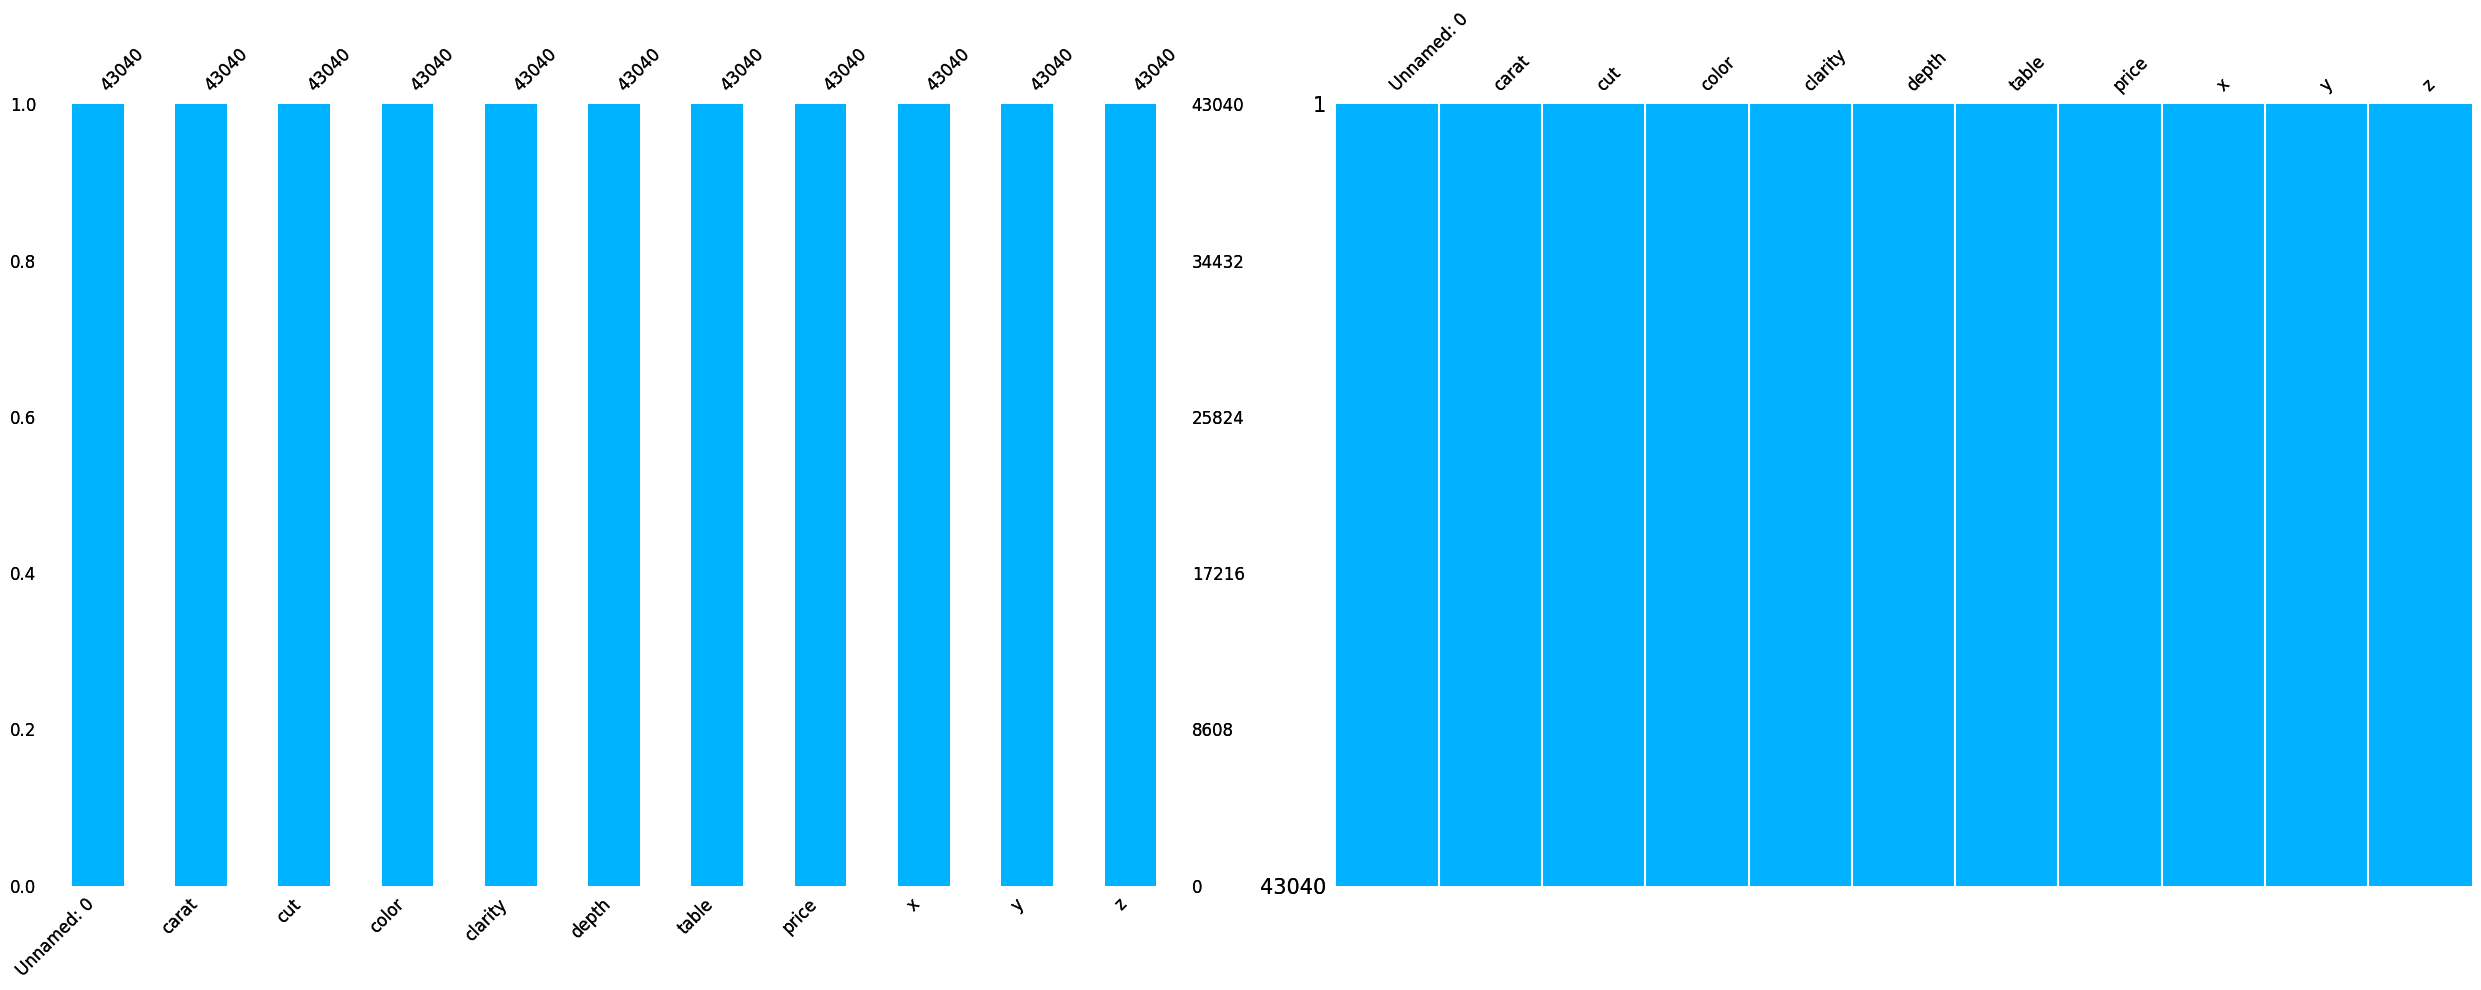

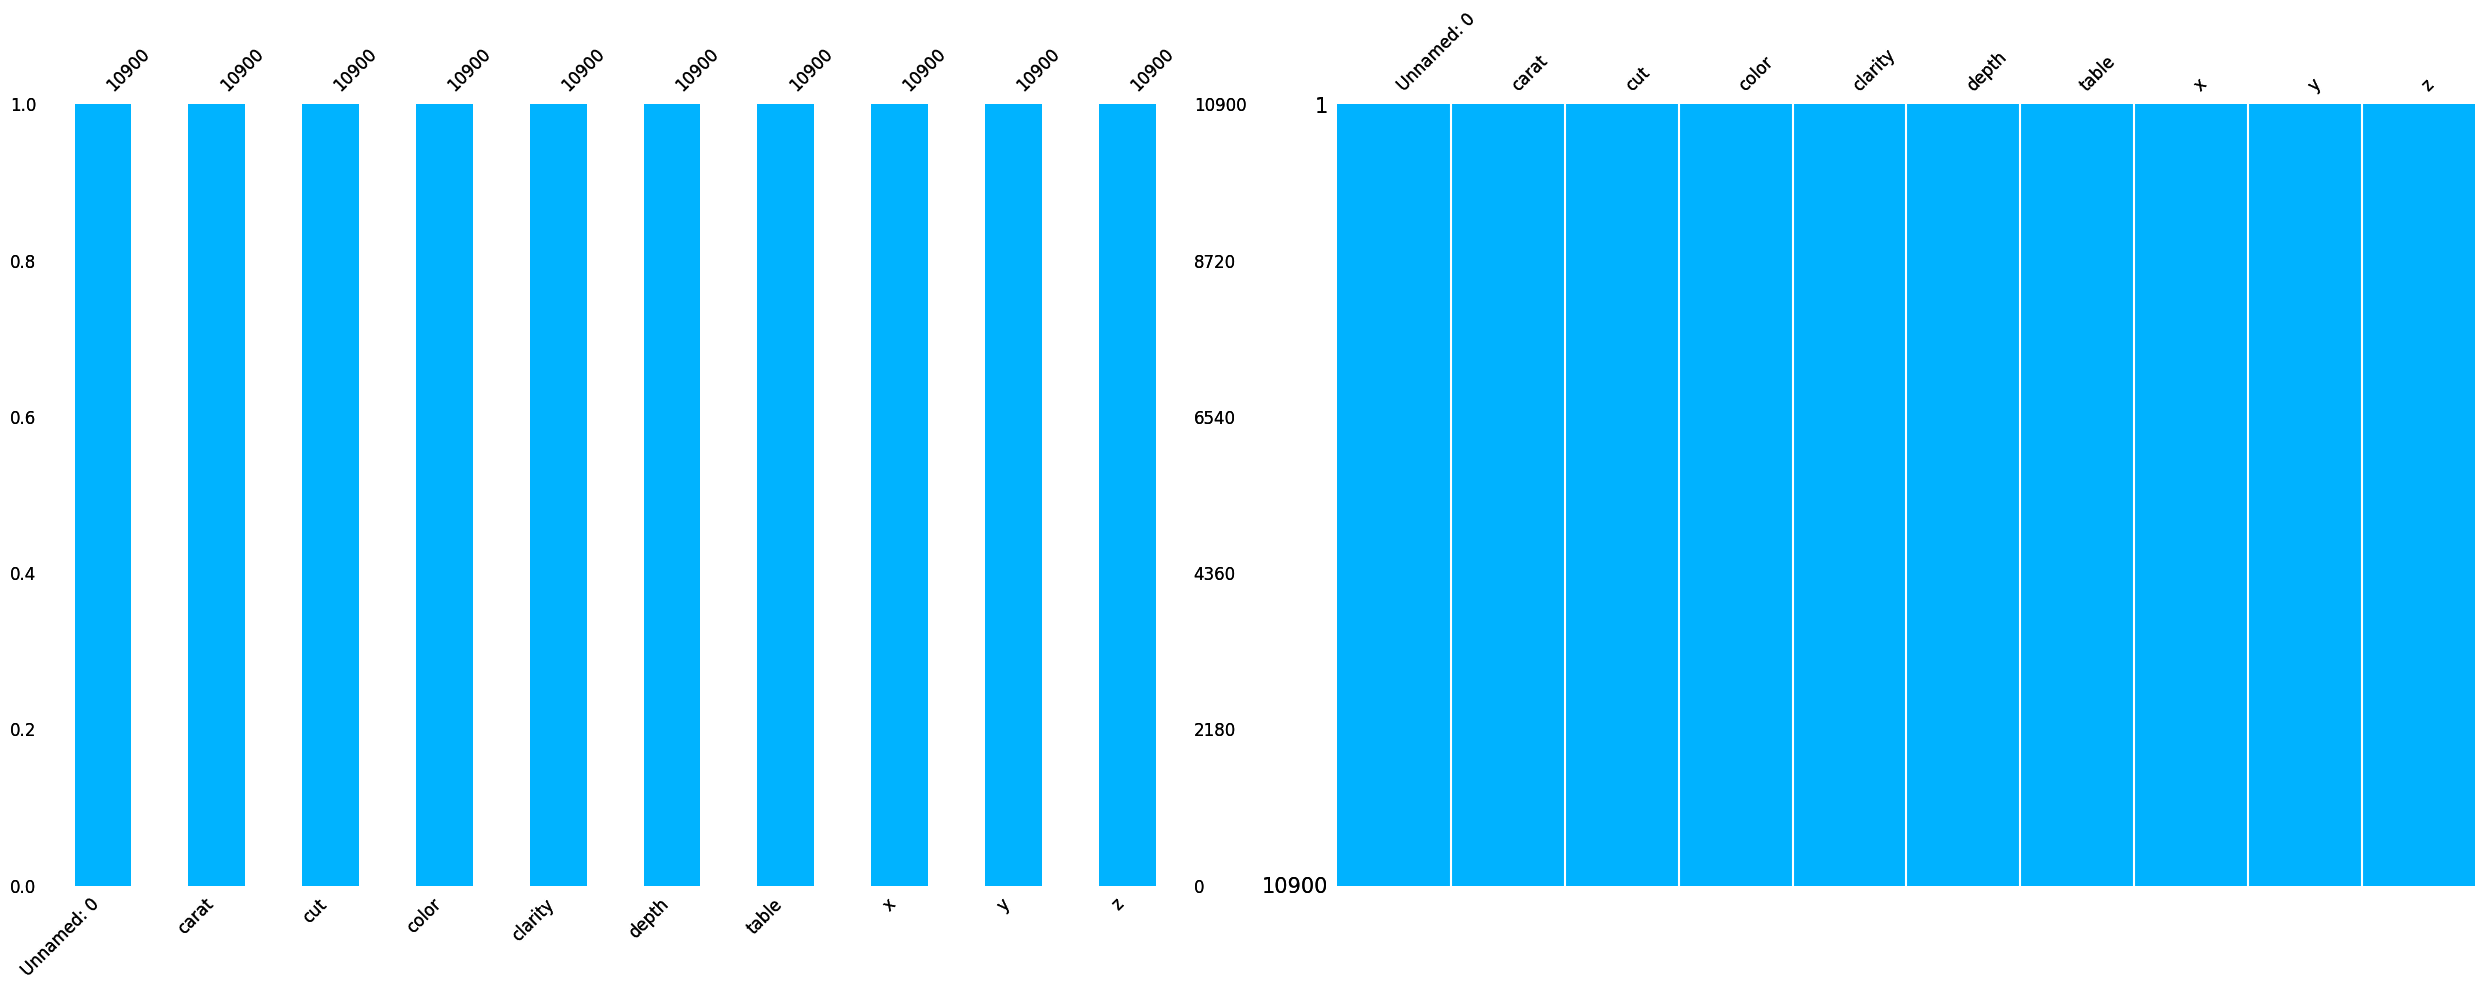

In [5]:
MissingDataPlot_train = display(MissingDataPlot(train));
MissingDataPlot_test = display(MissingDataPlot(test));

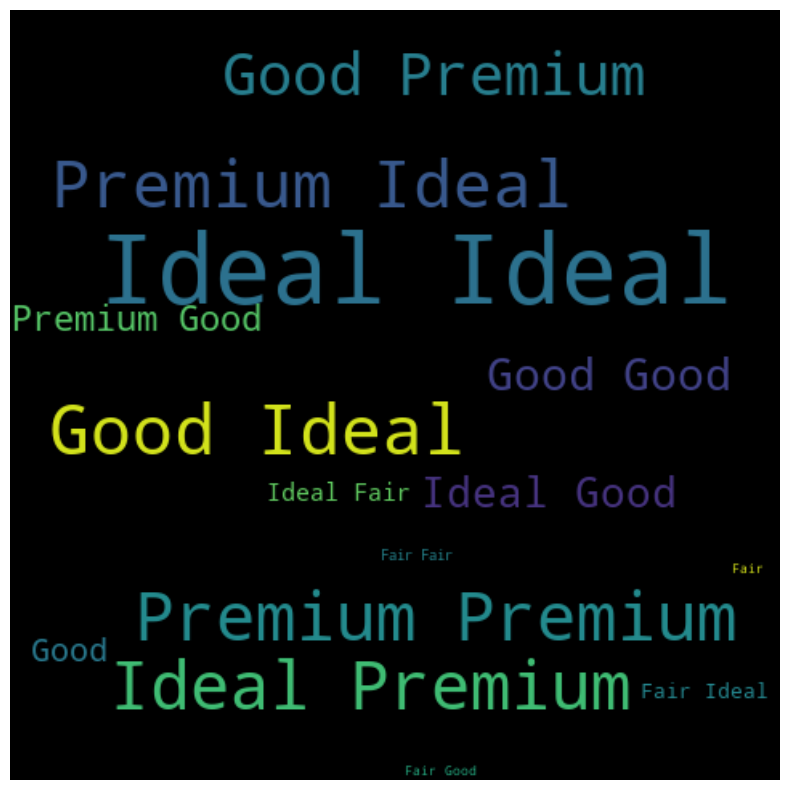

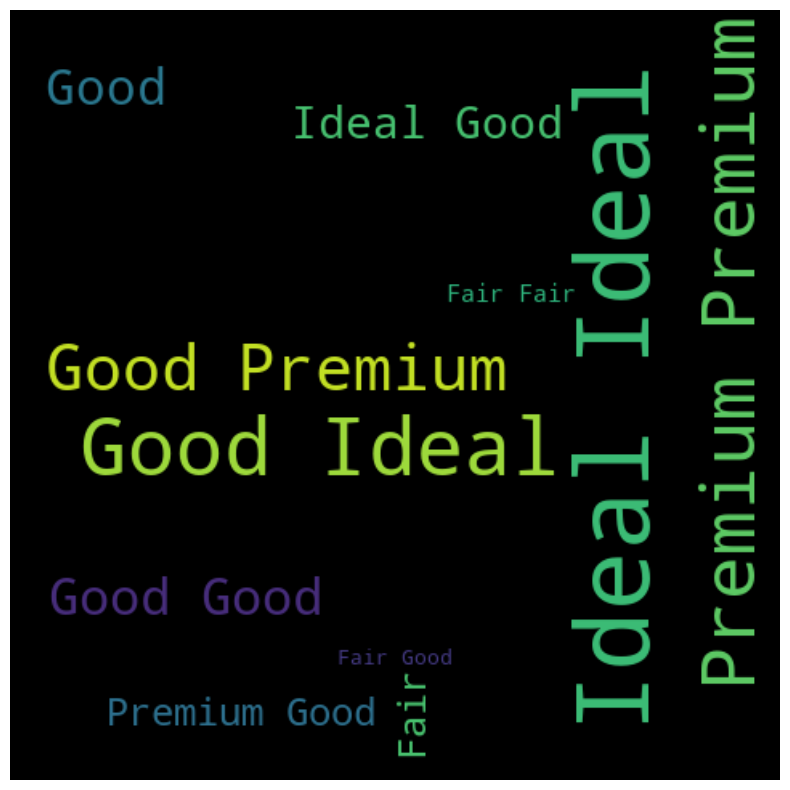

In [6]:
plt.figure(figsize =(10,10))
text = ' '.join(list(train['cut']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

plt.figure(figsize =(10,10))
text = ' '.join(list(test['cut']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

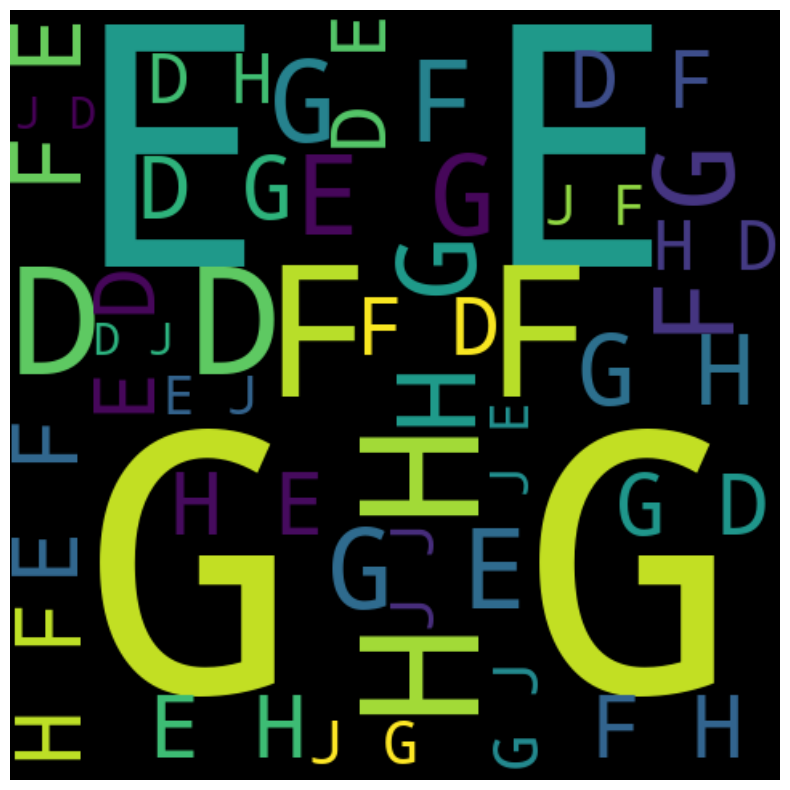

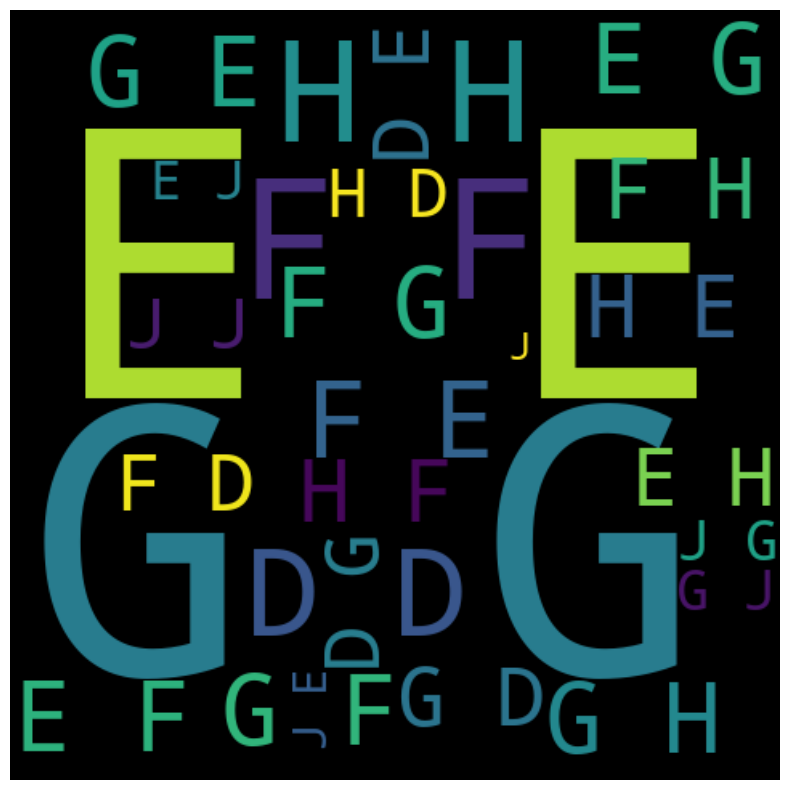

In [7]:
plt.figure(figsize =(10,10))
text = ' '.join(list(train['color']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

plt.figure(figsize =(10,10))
text = ' '.join(list(test['color']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

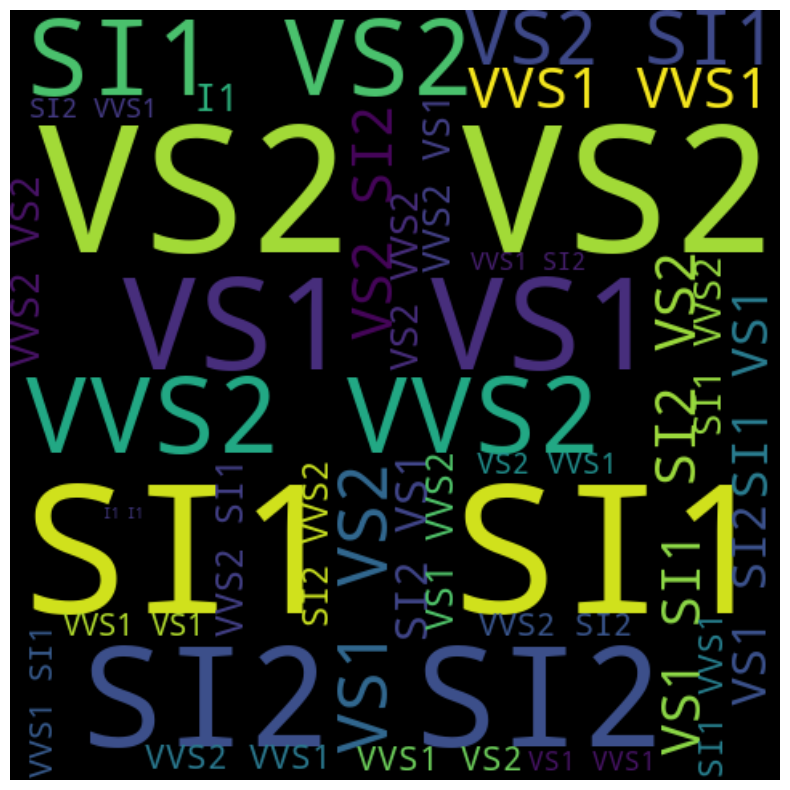

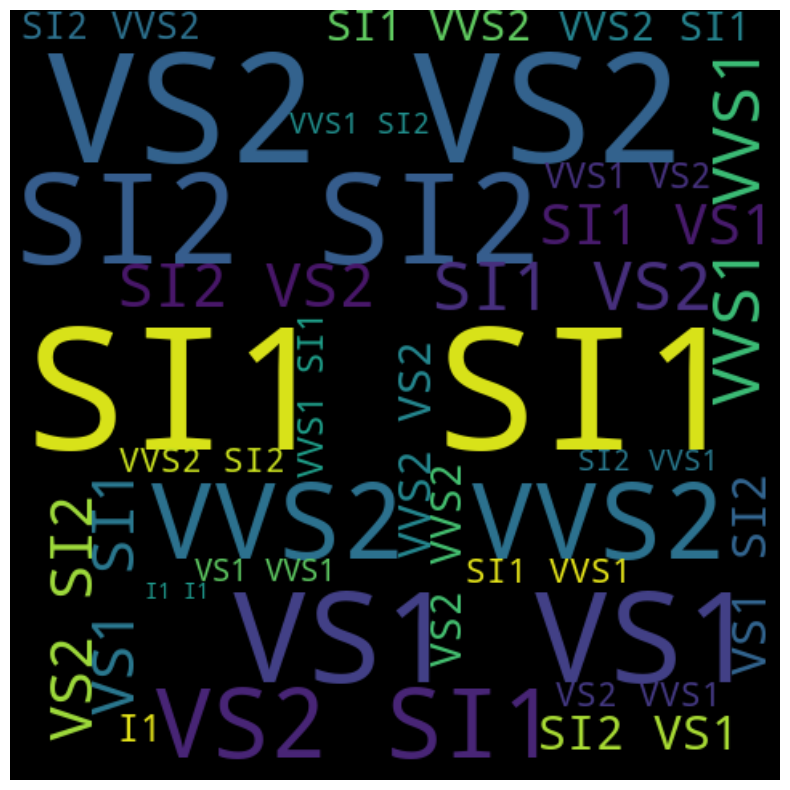

In [8]:
plt.figure(figsize =(10,10))
text = ' '.join(list(train['clarity']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

plt.figure(figsize =(10,10))
text = ' '.join(list(test['clarity']))
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5516\127146448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<AxesSubplot: xlabel='clarity', ylabel='price'>

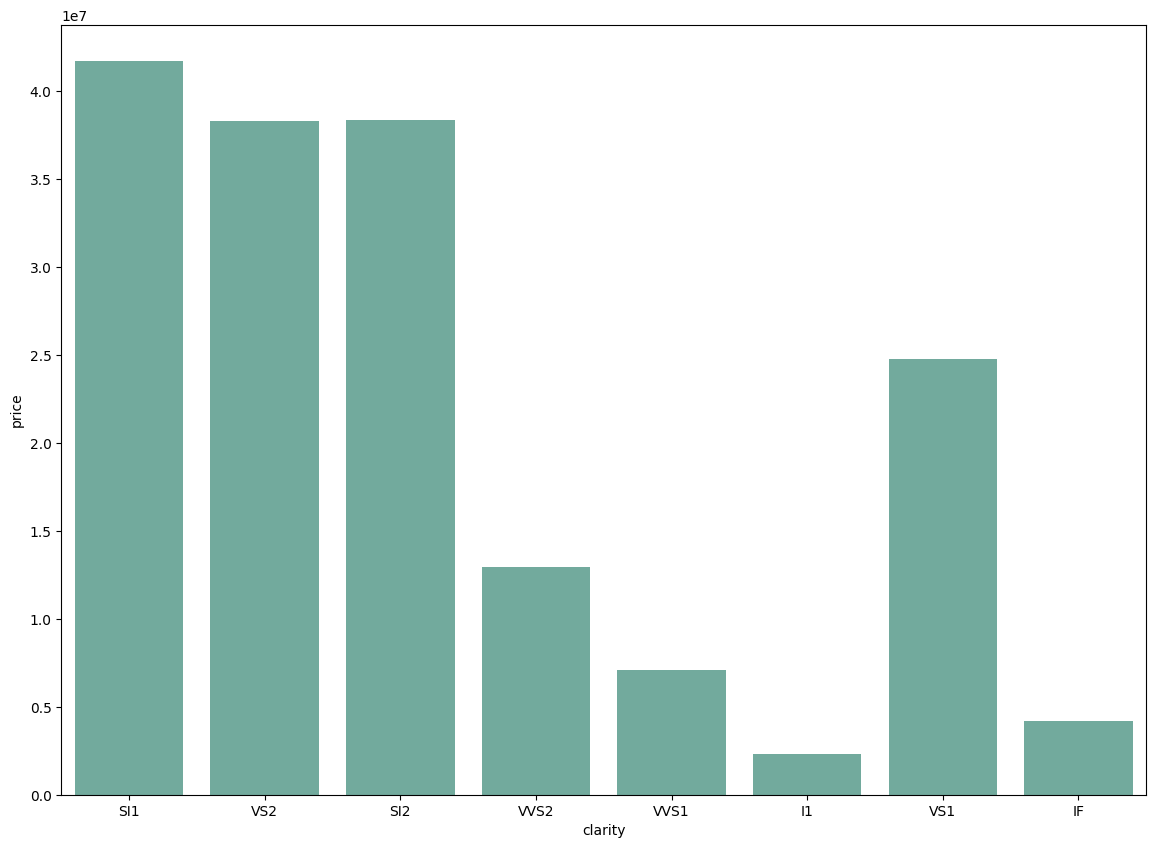

In [9]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="clarity", 
    data=train, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5516\2839858764.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<AxesSubplot: xlabel='cut', ylabel='price'>

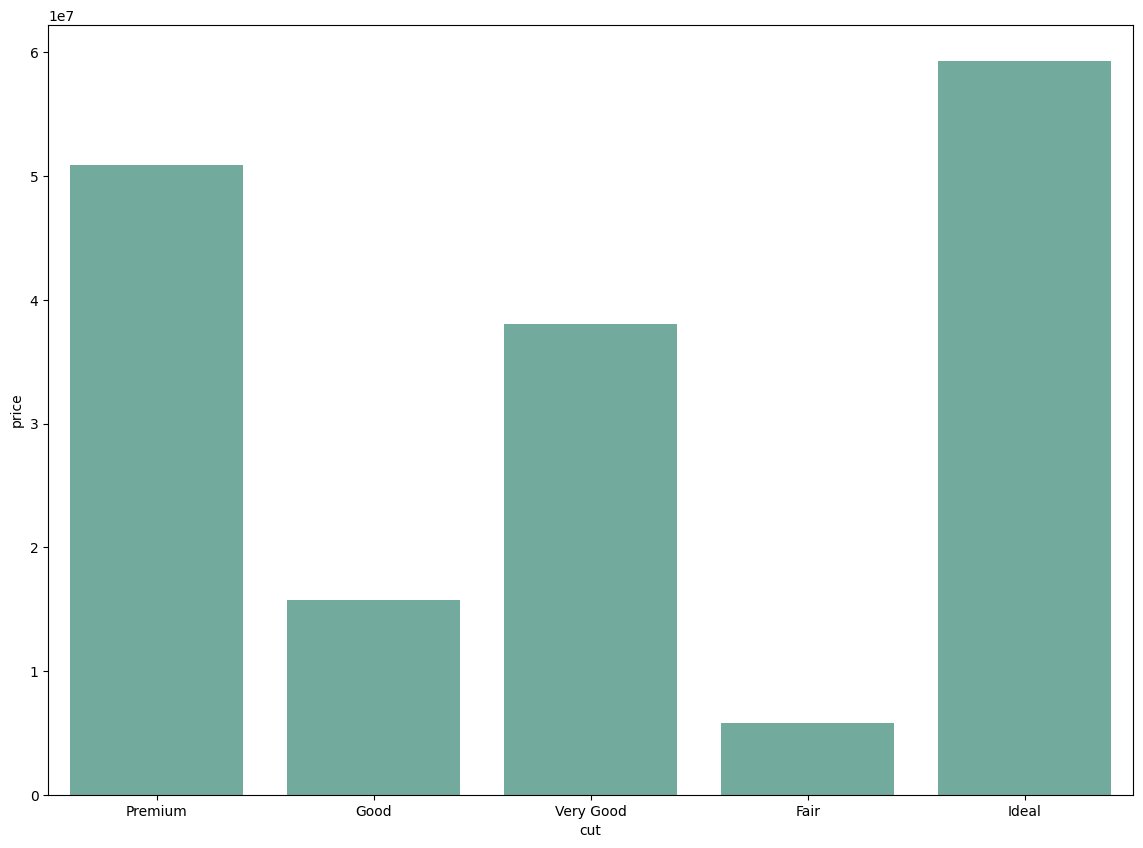

In [10]:
plt.figure(figsize=(14, 10));

sns.barplot(
    y="price", 
    x="cut", 
    data=train, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')

<AxesSubplot: xlabel='cut', ylabel='price'>

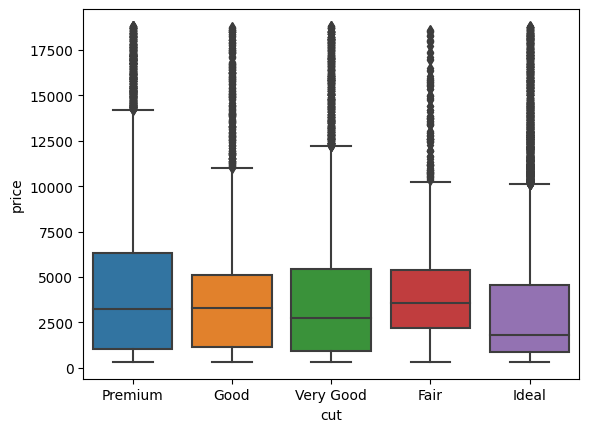

In [11]:
sns.boxplot( x=train["cut"], y=train["price"] )

<AxesSubplot: xlabel='color', ylabel='price'>

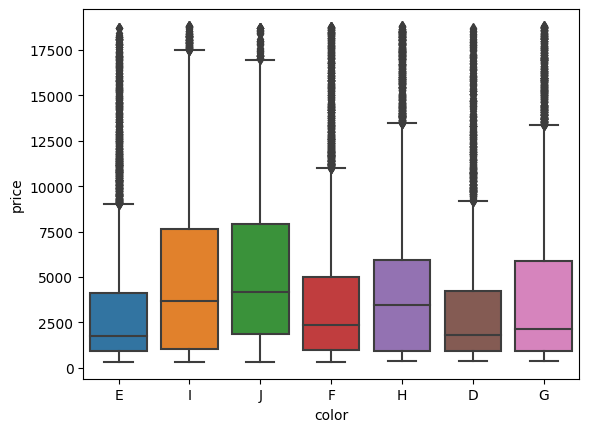

In [12]:
sns.boxplot( x=train["color"], y=train["price"] )

<AxesSubplot: xlabel='clarity', ylabel='price'>

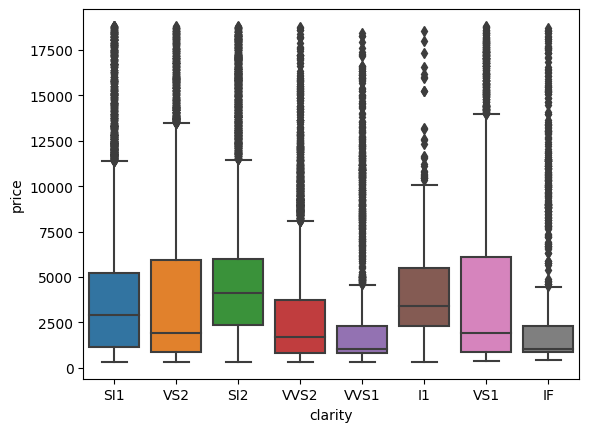

In [13]:
sns.boxplot( x=train["clarity"], y=train["price"] )

In [14]:
train_num = train.select_dtypes(['float64','int64'])
train_obj =  train.select_dtypes('object')
test_num = test.select_dtypes(['float64','int64'])
test_obj =  test.select_dtypes('object')

In [15]:
train_obj_ord = train_obj[['cut','clarity']]
train_obj_no = train_obj[['color']]
test_obj_ord = test_obj[['cut','clarity']]
test_obj_no = test_obj[['color']]

In [16]:
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(train_obj_ord)
train_obj_ord = pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])
diamond_cat_encoded = ordinal_encoder.fit_transform(test_obj_ord)
test_obj_ord = pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])

In [17]:
cat_encoder = OneHotEncoder()

train_obj_no = cat_encoder.fit_transform(train_obj_no)
train_obj_no = pd.DataFrame(train_obj_no.toarray(),dtype=np.float64,columns=['D', 'E', 'J', 'G', 'H' ,'I', 'J'])
test_obj_no = cat_encoder.fit_transform(test_obj_no)
test_obj_no = pd.DataFrame(test_obj_no.toarray(),dtype=np.float64,columns=['D', 'E', 'J', 'G', 'H' ,'I', 'J'])

In [18]:
train_processing = pd.concat([train_num,train_obj_ord,train_obj_no],axis=1)
display(train_processing.sample())
test_processing = pd.concat([test_num,test_obj_ord,test_obj_no],axis=1)
display(test_processing.sample())

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,clarity,D,E,J,G,H,I,J
21957,27309,2.05,62.5,57.0,17811,8.09,8.07,5.05,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,Unnamed: 0,carat,depth,table,x,y,z,cut,clarity,D,E,J,G,H,I,J
5663,29236,0.43,62.3,53.0,4.84,4.86,3.02,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
train_processing["volume"] = train_processing["x"]*train_processing["y"]*train_processing["z"]
train_processing = train_processing.drop(['x', 'y', 'z'], axis=1)

test_processing["volume"] = test_processing["x"]*test_processing["y"]*test_processing["z"]
test_processing = test_processing.drop(['x', 'y', 'z'], axis=1)

In [20]:
display(train_processing.sample())
display(test_processing.sample())

,Unnamed: 0,carat,depth,table,price,cut,clarity,D,E,J,G,H,I,J,volume
29031,35981,0.42,60.8,59.0,921,3.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.068295


,Unnamed: 0,carat,depth,table,cut,clarity,D,E,J,G,H,I,J,volume
6959,36037,0.41,62.6,54.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.518456


In [21]:
X_train = train_processing.drop(['price','Unnamed: 0'],axis=1)
y_train = train_processing['price']

In [22]:
test = test_processing.drop('Unnamed: 0',axis=1)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 7]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  {'bootstrap': [True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameters ",grid_search.best_params_)

best parameters  {'max_features': 7, 'n_estimators': 30}


In [25]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2110.399494509 {'max_features': 2, 'n_estimators': 3}
2004.761758019562 {'max_features': 2, 'n_estimators': 10}
1998.6933484355004 {'max_features': 2, 'n_estimators': 30}
1990.2774859090205 {'max_features': 4, 'n_estimators': 3}
1936.1236200008038 {'max_features': 4, 'n_estimators': 10}
1946.8547370732638 {'max_features': 4, 'n_estimators': 30}
1954.2965747896876 {'max_features': 6, 'n_estimators': 3}
1939.457297180995 {'max_features': 6, 'n_estimators': 10}
1923.900354907872 {'max_features': 6, 'n_estimators': 30}
1958.2775707920546 {'max_features': 7, 'n_estimators': 3}
1919.5483407078905 {'max_features': 7, 'n_estimators': 10}
1911.0935047655355 {'max_features': 7, 'n_estimators': 30}
2105.048315894968 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2014.392914178855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1998.5145299763544 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1958.2464482978316 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [26]:
model = grid_search.best_estimator_
pred = model.predict(test)
main_test = pd.read_csv('data/test.csv')
main_test['perd'] = pred

In [27]:
sub = main_test[['Unnamed: 0', 'perd']]

In [28]:
sub.to_csv('submission.csv',index = False)

In [29]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [30]:
loaded_model = joblib.load('model.pkl')

In [51]:
loaded_model.predict(np.array(test.iloc[3]).reshape(1, -1))

C:\Users\ASUS\OneDrive\Desktop\Barmj project\Diamond-SHAI_For_AI-project\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([411.03333333])